# Web服务器

### 搭建python自带静态web服务器
- 静态Web服务器

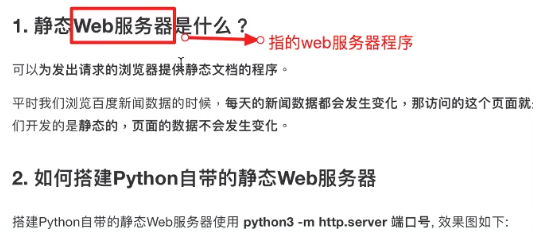
    - 可以为**发出请求的浏览器提供静态文档的程序**
- 搭建python自带的静态Web服务器使用（python3 -m http.server 端口号）这个命令，端口号不指定默认是8000
    - -m表示运行包里面的模块，执行这个命令的时候，需要进入你**自己指定静态文件的目录**，然后通过浏览器就能访问对应的html文件了
    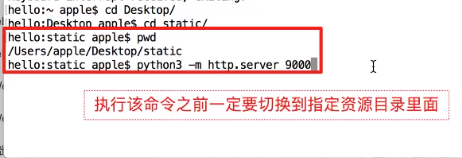
- 小结
    - 静态Web服务器是为发出请求的浏览器提供静态文档的程序

In [ ]:
### 静态Web服务器-返回固定页面数据
import socket


# 判断是否是主模块的代码
if __name__ == "__main__":
    # 创建tcp服务端套接字
    tcp_server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 设置端口号复用，程序退出端口号立即释放
    tcp_server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, True)
    # 绑定端口号
    tcp_server_socket.bind(("", 8000))
    # 设置监听
    tcp_server_socket.listen(128)
    # 循环等待接收客户端的连接请求
    while True:
        # 等待接收客户端的连接请求
        new_socket, ip_port = tcp_server_socket.accept()
        # 代码执行到此，说明连接建立成功
        # 接收客户端的请求信息
        recv_data = new_socket.recv(4096)
        print(recv_data)
        
        # 打开文件读取文件中的数据
        with open("***", "r") as file: # 这里的file表示打开文件的对象
            file_data = file.read()
            # 提示：with open 关闭文件这步操作不用程序员来完成，系统帮我们来完成
            
        # 响应行
        response_line = "HTTP/1.1 200 OK\r\n"
        # 响应头
        response_header = "Server: PWS/1.0\r\n"
        # 响应体
        response_body = file_data
        
        # 把数据封装成http响应报文格式的数据
        response = response_line + response_header + "\r\n" + response_body
        # 把字符串编码成二进制
        response_data = response.encode("utf-8")
        # 发送给浏览器的响应报文数据
        new_socket.send(response_data)
        # 关闭服务于客户端的套接字
        new_socket.close()

In [ ]:
# 静态Web服务器-返回指定页面数据
import socket
import os


def main():
    # 创建tcp服务端套接字
    tcp_server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 设置端口号复用，程序退出端口号立即释放
    tcp_server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, True)
    # 绑定端口号
    tcp_server_socket.bind("", 8000)
    # 设置监听
    tcp_server_socket.listen(128)
    # 循环等待接收客户端的连接请求
    while True:
        # 等待接收客户端的连接请求
        new_socket, ip_port = tcp_server_socket.accept()
        # 代码执行到此，说明连接建立成功
        # 接收客户端的请求信息
        recv_data = new_socket.recv(4096)
        # 判断接收的数据长度是否为0
        if len(recv_data) == 0:
            new_socket.close()
            return
        
        # 对二进制数据进行解码
        recv_centent = recv_data.decode("utf-8")
        print(recv_centent)
        
        # 对数据按照空格进行分割
        request_list = recv_centent.split(" ", maxsplit=2)
        # 获取请求的资源路径
        request_path = request_list[1]
        print(request_path)
        
        # 判断请求的是否是根目录，如果是根目录设置返回的信息
        if request_path == "/":
            request_path = "/index.html"
            
        # 打开文件读取文件中的数据，提示：这里使用rb模式，兼容打开图片文件
        with open("static" + request_path, "rb") as file: # 这里的file表示打开文件的对象
            file_data = file.read()
        # 提示：with open 关闭文件这步操作不用程序员来完成，系统帮我们来完成
        
        # 响应行
        response_line = "HTTP/1.1 200 ok\r\n"
        # 响应头
        response_header = "Server: PWS/1.0\r\n"
        # 响应体
        response_body = file_data
        
        # 把数据封装成http响应报文格式的数据
        response = (response_line + 
                    response_header + 
                    "\r\n").encode("utf-8") + response_body
        
        # 发送给浏览器的响应报文数据
        new_socket.send(response)
        
        # 关闭服务于客户端的套接字
        new_socket.close()
        
        
# 判断是否是主模块的代码
if __name__ == "__main__":
    main()

In [ ]:
# 静态Web服务器-返回指定页面数据，当找不到相应页面时，返回404页面数据
import socket
import os


def main():
    # 创建tcp服务端套接字
    tcp_server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 设置端口号复用，程序退出端口号立即释放
    tcp_server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, True)
    # 绑定端口号
    tcp_server_socket.bind("", 8000)
    # 设置监听
    tcp_server_socket.listen(128)
    # 循环等待接收客户端的连接请求
    while True:
        # 等待接收客户端的连接请求
        new_socket, ip_port = tcp_server_socket.accept()
        # 代码执行到此，说明连接建立成功
        # 接收客户端的请求信息
        recv_data = new_socket.recv(4096)
        # 判断接收的数据长度是否为0
        if len(recv_data) == 0:
            new_socket.close()
            return
        
        # 对二进制数据进行解码
        recv_centent = recv_data.decode("utf-8")
        print(recv_centent)
        
        # 对数据按照空格进行分割
        request_list = recv_centent.split(" ", maxsplit=2)
        # 获取请求的资源路径
        request_path = request_list[1]
        print(request_path)
        
        # 判断请求的是否是根目录，如果是根目录设置返回的信息
        if request_path == "/":
            request_path = "/index.html"
            
        # 判断输入的页面是否存在
        # 1. os.path.exits 判断某个文件是否存在
        # os.path.exists("static/" + request_path)
        # 2. try-except
        
        try:
            # 打开文件读取文件中的数据，提示：这里使用rb模式，兼容打开图片文件
            with open("static" + request_path, "rb") as file: # 这里的file表示打开文件的对象
                file_data = file.read()
            # 提示：with open 关闭文件这步操作不用程序员来完成，系统帮我们来完成
        except Exception as e:
            # 代码执行到此，说明没有请求的该文件，返回404状态
            # 响应行
            response_line = "HTTP/1.1 404 Not F\r\n"
            # 响应头
            response_header = "Server: PWS/1.0\r\n"
            # 读取404页面数据
            with open("static/error.html", "rb") as file:
                file_data = file.read()
            # 响应体
            response_body = file_data
        
            # 把数据封装成http响应报文格式的数据
            response = (response_line + 
                        response_header + 
                        "\r\n").encode("utf-8") + response_body
            # 发送给浏览器的相应报文数据
            new_socket.send(response)
        else:    
            # 代码执行到此，说明文件存在，返回200状态信息
            # 响应行
            response_line = "HTTP/1.1 200 ok\r\n"
            # 响应头
            response_header = "Server: PWS/1.0\r\n"
            # 响应体
            response_body = file_data
        
            # 把数据封装成http响应报文格式的数据
            response = (response_line + 
                        response_header + 
                        "\r\n").encode("utf-8") + response_body

            # 发送给浏览器的响应报文数据
            new_socket.send(response)
        finally:
            # 关闭服务于客户端的套接字
            new_socket.close()
        
        
# 判断是否是主模块的代码
if __name__ == "__main__":
    main()

In [ ]:
# 静态Web服务器-多任务版
import socket
import os
import threading


# 处理客户端请求
def handle_client_request(new_socket):
    # 接收客户端的请求信息
    recv_data = new_socket.recv(4096)
    # 判断接收的数据长度是否为0
    if len(recv_data) == 0:
        new_socket.close()
        return

    # 对二进制数据进行解码
    recv_centent = recv_data.decode("utf-8")
    print(recv_centent)

    # 对数据按照空格进行分割
    request_list = recv_centent.split(" ", maxsplit=2)
    # 获取请求的资源路径
    request_path = request_list[1]
    print(request_path)

    # 判断请求的是否是根目录，如果是根目录设置返回的信息
    if request_path == "/":
        request_path = "/index.html"

    # 判断输入的页面是否存在
    # 1. os.path.exits 判断某个文件是否存在
    # os.path.exists("static/" + request_path)
    # 2. try-except

    try:
        # 打开文件读取文件中的数据，提示：这里使用rb模式，兼容打开图片文件
        with open("static" + request_path, "rb") as file: # 这里的file表示打开文件的对象
            file_data = file.read()
        # 提示：with open 关闭文件这步操作不用程序员来完成，系统帮我们来完成
    except Exception as e:
        # 代码执行到此，说明没有请求的该文件，返回404状态
        # 响应行
        response_line = "HTTP/1.1 404 Not Found\r\n"
        # 响应头
        response_header = "Server: PWS/1.0\r\n"
        # 读取404页面数据
        with open("static/error.html", "rb") as file:
            file_data = file.read()
        # 响应体
        response_body = file_data

        # 把数据封装成http响应报文格式的数据
        response = (response_line + 
                    response_header + 
                    "\r\n").encode("utf-8") + response_body
        # 发送给浏览器的相应报文数据
        new_socket.send(response)
    else:    
        # 代码执行到此，说明文件存在，返回200状态信息
        # 响应行
        response_line = "HTTP/1.1 200 ok\r\n"
        # 响应头
        response_header = "Server: PWS/1.0\r\n"
        # 响应体
        response_body = file_data

        # 把数据封装成http响应报文格式的数据
        response = (response_line + 
                    response_header + 
                    "\r\n").encode("utf-8") + response_body

        # 发送给浏览器的响应报文数据
        new_socket.send(response)
    finally:
        # 关闭服务于客户端的套接字
        new_socket.close()


def main():
    # 创建tcp服务端套接字
    tcp_server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 设置端口号复用，程序退出端口号立即释放
    tcp_server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, True)
    # 绑定端口号
    tcp_server_socket.bind(("", 8000))
    # 设置监听
    tcp_server_socket.listen(128)
    # 循环等待接收客户端的连接请求
    while True:
        # 等待接收客户端的连接请求
        new_socket, ip_port = tcp_server_socket.accept()
        # 代码执行到此，说明连接建立成功
        sub_thread = threading.Thread(target=handle_client_request, args=(new_socket,))
        # 设置成为守护主线程
        sub_thread.setDaemon(True)
        # 启动子线程执行对应的任务
        sub_thread.start()
        
        
# 判断是否是主模块的代码
if __name__ == "__main__":
    main()

In [ ]:
# 静态Web服务器-面向对象版
import socket
import os
import threading


# http协议的Web服务器类
class HttpWebServer(object):
    def __init__(self):
        # 创建tcp服务端套接字
    tcp_server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 设置端口号复用，程序退出端口号立即释放
    tcp_server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, True)
    # 绑定端口号
    tcp_server_socket.bind("", 8000)
    # 设置监听
    tcp_server_socket.listen(128)
    # 把tcp服务器的套接字作为Web服务器对象的属性
    self.tcp_server_socket = tcp_server_socket
    
    # 处理客户端请求
    @staticmethod
    def handle_client_request(new_socket):
        # 接收客户端的请求信息
        recv_data = new_socket.recv(4096)
        # 判断接收的数据长度是否为0
        if len(recv_data) == 0:
            new_socket.close()
            return

        # 对二进制数据进行解码
        recv_centent = recv_data.decode("utf-8")
        print(recv_centent)

        # 对数据按照空格进行分割
        request_list = recv_centent.split(" ", maxsplit=2)
        # 获取请求的资源路径
        request_path = request_list[1]
        print(request_path)

        # 判断请求的是否是根目录，如果是根目录设置返回的信息
        if request_path == "/":
            request_path = "/index.html"

        # 判断输入的页面是否存在
        # 1. os.path.exits 判断某个文件是否存在
        # os.path.exists("static/" + request_path)
        # 2. try-except

        try:
            # 打开文件读取文件中的数据，提示：这里使用rb模式，兼容打开图片文件
            with open("static" + request_path, "rb") as file: # 这里的file表示打开文件的对象
                file_data = file.read()
            # 提示：with open 关闭文件这步操作不用程序员来完成，系统帮我们来完成
        except Exception as e:
            # 代码执行到此，说明没有请求的该文件，返回404状态
            # 响应行
            response_line = "HTTP/1.1 404 Not Found\r\n"
            # 响应头
            response_header = "Server: PWS/1.0\r\n"
            # 读取404页面数据
            with open("static/error.html", "rb") as file:
                file_data = file.read()
            # 响应体
            response_body = file_data

            # 把数据封装成http响应报文格式的数据
            response = (response_line + 
                        response_header + 
                        "\r\n").encode("utf-8") + response_body
            # 发送给浏览器的相应报文数据
            new_socket.send(response)
        else:    
            # 代码执行到此，说明文件存在，返回200状态信息
            # 响应行
            response_line = "HTTP/1.1 200 ok\r\n"
            # 响应头
            response_header = "Server: PWS/1.0\r\n"
            # 响应体
            response_body = file_data

            # 把数据封装成http响应报文格式的数据
            response = (response_line + 
                        response_header + 
                        "\r\n").encode("utf-8") + response_body

            # 发送给浏览器的响应报文数据
            new_socket.send(response)
        finally:
            # 关闭服务于客户端的套接字
            new_socket.close()
    
    # 启动服务器方法
    def start(self):
         # 循环等待接收客户端的连接请求
    while True:
        # 等待接收客户端的连接请求
        new_socket, ip_port = self.tcp_server_socket.accept()
        # 代码执行到此，说明连接建立成功
        sub_thread = threading.Thread(target=self.handle_client_request, args=(new_socket,))
        # 设置成为守护主线程
        sub_thread.setDaemon(True)
        # 启动子线程执行对应的任务
        sub_thread.start()


def main():
    # 创建Web服务器
    web_server = HttpWebServer()
    # 启动服务器
    web_server.start()
   
        
# 判断是否是主模块的代码
if __name__ == "__main__":
    main()

In [1]:
# 获取终端命令行参数
import sys

# 获取终端命令行参数,解释器后面的参数都是终端命令行参数
params = sys.argv

# 列表里面的每项数据都是字符串类型
print(params, type(params))

['c:\\users\\dell\\scoop\\apps\\python37\\current\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\DELL\\AppData\\Roaming\\jupyter\\runtime\\kernel-5ddc1eff-0c48-41fc-8884-6df13dfb1e21.json'] <class 'list'>


In [ ]:
# 静态Web服务器-终端命令行启动绑定端口号版
import socket
import os
import threading
import sys


# http协议的Web服务器类
class HttpWebServer(object):
    def __init__(self, port):
        # 创建tcp服务端套接字
    tcp_server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    # 设置端口号复用，程序退出端口号立即释放
    tcp_server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, True)
    # 绑定端口号
    tcp_server_socket.bind("", port)
    # 设置监听
    tcp_server_socket.listen(128)
    # 把tcp服务器的套接字作为Web服务器对象的属性
    self.tcp_server_socket = tcp_server_socket
    
    # 处理客户端请求
    @staticmethod
    def handle_client_request(new_socket):
        # 接收客户端的请求信息
        recv_data = new_socket.recv(4096)
        # 判断接收的数据长度是否为0
        if len(recv_data) == 0:
            new_socket.close()
            return

        # 对二进制数据进行解码
        recv_centent = recv_data.decode("utf-8")
        print(recv_centent)

        # 对数据按照空格进行分割
        request_list = recv_centent.split(" ", maxsplit=2)
        # 获取请求的资源路径
        request_path = request_list[1]
        print(request_path)

        # 判断请求的是否是根目录，如果是根目录设置返回的信息
        if request_path == "/":
            request_path = "/index.html"

        # 判断输入的页面是否存在
        # 1. os.path.exits 判断某个文件是否存在
        # os.path.exists("static/" + request_path)
        # 2. try-except

        try:
            # 打开文件读取文件中的数据，提示：这里使用rb模式，兼容打开图片文件
            with open("static" + request_path, "rb") as file: # 这里的file表示打开文件的对象
                file_data = file.read()
            # 提示：with open 关闭文件这步操作不用程序员来完成，系统帮我们来完成
        except Exception as e:
            # 代码执行到此，说明没有请求的该文件，返回404状态
            # 响应行
            response_line = "HTTP/1.1 200 ok\r\n"
            # 响应头
            response_header = "Server: PWS/1.0\r\n"
            # 读取404页面数据
            with open("static/error.html", "rb") as file:
                file_data = file.read()
            # 响应体
            response_body = file_data

            # 把数据封装成http响应报文格式的数据
            response = (response_line + 
                        response_header + 
                        "\r\n").encode("utf-8") + response_body
            # 发送给浏览器的相应报文数据
            new_socket.send(response)
        else:    
            # 代码执行到此，说明文件存在，返回200状态信息
            # 响应行
            response_line = "HTTP/1.1 200 ok\r\n"
            # 响应头
            response_header = "Server: PWS/1.0\r\n"
            # 响应体
            response_body = file_data

            # 把数据封装成http响应报文格式的数据
            response = (response_line + 
                        response_header + 
                        "\r\n").encode("utf-8") + response_body

            # 发送给浏览器的响应报文数据
            new_socket.send(response)
        finally:
            # 关闭服务于客户端的套接字
            new_socket.close()
    
    # 启动服务器方法
    def start(self):
         # 循环等待接收客户端的连接请求
    while True:
        # 等待接收客户端的连接请求
        new_socket, ip_port = self.tcp_server_socket.accept()
        # 代码执行到此，说明连接建立成功
        sub_thread = threading.Thread(target=self.handle_client_request, args=(new_socket,))
        # 设置成为守护主线程
        sub_thread.setDaemon(True)
        # 启动子线程执行对应的任务
        sub_thread.start()


def main():
    # 获取终端命令行参数
    params = sys.argv
    if len(params) != 2:
        print("执行的命令格式如下：python3 xxx.py 9000")
        return
    
    # 判断第二个参数是否都是由数字组成的字符串
    if not params[1].isdigit():
        print("执行的命令格式如下：python3 xxx.py 9000")
        return
    
    # 代码执行到期，说明命令行参数的个数一定是2个，并且第二个参数是由数字组成的字符串
    port = int(params[1])
    
    # 创建Web服务器
    web_server = HttpWebServer(port)
    # 启动服务器
    web_server.start()
   
        
# 判断是否是主模块的代码
if __name__ == "__main__":
    main()